In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("SMSSPamCollection",sep="\t",names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
for i in range(10):
    print(df.iloc[i, -1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

## Data Cleaning

In [6]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [7]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z0-9]",' ',sms)
    # Tokenization
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t)>1]
    sms = [sn.stem(word)  for word in sms if word not in stop]
    sms = ' '.join(sms)


    return sms

In [8]:
clean_text("Get is.. are... them.. UNLIMITED FREE <!!!!> !!!at Data 100GB ... Rs.0")

'get unlimit free data 100gb rs'

In [9]:
df['clean_text'] = df['text'].apply(clean_text)

In [10]:
df.head(10)

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl week word back like fun still...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,winner valu network custom select receivea 900...
9,spam,Had your mobile 11 months or more? U R entitle...,mobil 11 month entitl updat latest colour mobi...


## WordCloud

In [11]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text']

In [12]:
hamdata

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 4825, dtype: object

In [13]:
' '.join(hamdata)

'go jurong point crazi avail bugi great world la buffet cine got amor wat ok lar joke wif oni dun say earli hor alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh watch eh rememb spell name yes naughti make wet fine way feel way gota serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bus fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarcast want live us yeah got

In [14]:
def wordCloud(data):
    words =' '.join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

Ham Data words :


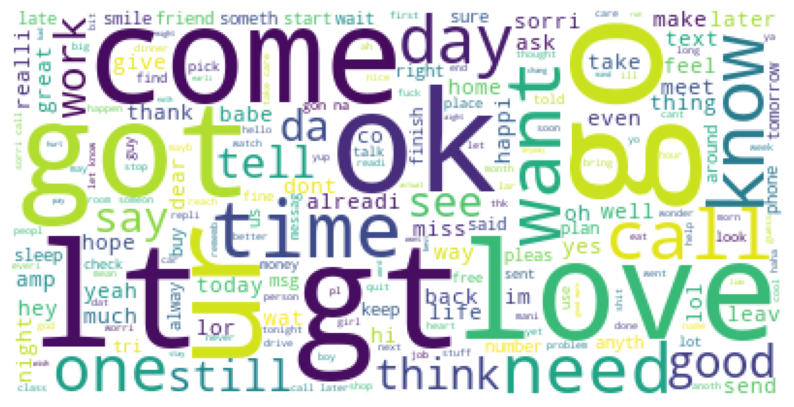

In [15]:
print("Ham Data words :")
wordCloud(hamdata)

In [16]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text']

Spam Data words :


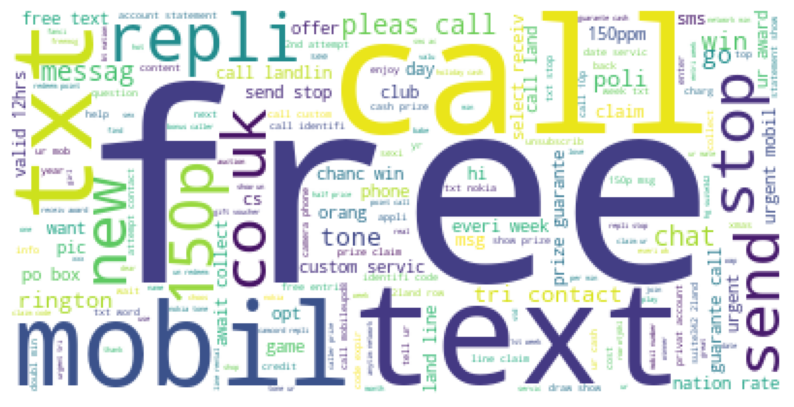

In [17]:
print("Spam Data words :")
wordCloud(spamdata)

## Text Featurization

In [18]:
cv = CountVectorizer(max_features=5000)

In [19]:
X = cv.fit_transform(df['clean_text'])

In [20]:
X.shape

(5572, 5000)

In [21]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [22]:
y

array([False, False,  True, ..., False, False, False], shape=(5572,))

## Model Building

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model = MultinomialNB()

In [25]:
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
y_pred=model.predict(X_test)

In [27]:
y_test, y_pred

(array([False,  True, False, ..., False,  True, False], shape=(1115,)),
 array([False,  True, False, ..., False,  True, False], shape=(1115,)))

In [28]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,False,False


## Evaluation

In [29]:
print("Accurancy of Training data :")
print(model.score(X_train,y_train))

Accurancy of Training data :
0.9914740857078752


In [30]:
print("Accurancy of Testing data :")
print(model.score(X_test,y_test))

Accurancy of Testing data :
0.9874439461883409


In [31]:
confusion_matrix(y_test, y_pred)

array([[948,   7],
       [  7, 153]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.96      0.96      0.96       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [34]:
f1_score(y_test, y_pred)

0.95625